### Dataset-->> https://www.kaggle.com/team-ai/bitcoin-price-prediction/version/1

### Layman Definition of Time  Series--
    whenever a data is collected over a period of Time, that is basically known as Time Series...
    eg.. collecting data of Covid cases

In [75]:
#### u can enable auto-complete in jupyter notebook by simply pressing Tab key 
### while writing code --

## 1.. Read data & lets perform basic basic analysis !

In [163]:
import numpy as np # linear algebra
import pandas as pd # data pre-processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('G:\Time_Series Data Analysis\Projects\Bitcoin/bitcoin_\
                    price_Training - Training.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [79]:
### In this notebook, we will explore closing price and predict it

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


## 2.. Doing Data Pre-processing !
        Check whether data-types are correct or not 
        check whether Data have missing value or not 
        check whether data have duplicate entries or not !
        

In [81]:
df.dtypes

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume         object
Market Cap     object
dtype: object

    Date is to be in Date-time format inorder to perform a time series analysis 
    but In the current dataset  , the date is stated as an object which 
    is to be converted in the date time format..

In [82]:
'''
how to convert feature into date-time
    a) using astype('datetime64[ns]')
    b) using pd.to_datetime()

'''

"\nhow to convert feature into date-time\n    a) using astype('datetime64[ns]')\n    b) using pd.to_datetime()\n\n"

In [83]:
'''
pandas Data Type for Time-Series : 
    a ) datetime64[ns]
datetime64[ns] is a 64 bit number ie it uses/occupies 64 bits or 8-Bytes
in computer memory to store datetime value ..

    b ) datetime64[ns, tz]

    c ) datetime64[ns, UTC]
    

    d ) dtype('<M8[ns]') or dtype('>M8[ns]')
 
## < represents byte order, small end （ the least significant byte is 
stored in the smallest address ）
## M is a type character code for Datetime,
## 8 represents element byte length, data size ie 8-byte or 64 bit 




    where UTC = Coordinated Universal Time
          ns  = nano second
          tz  = time zone


'''

"\npandas Data Type for Time-Series : \n    a ) datetime64[ns]\ndatetime64[ns] is a 64 bit number ie it uses/occupies 64 bits or 8-Bytes in computer memory to store datetime value ..\n\n    b ) datetime64[ns, tz]\n\n    c ) datetime64[ns, UTC]\n    \n\n    d ) dtype('<M8[ns]') or dtype('>M8[ns]')\n \n## < represents byte order, small end （ the least significant byte is stored in the smallest address ）\n## M is a type character code for Datetime, just like we have i for integer , c for Complex \n## 8 represents element byte length, data size ie 8-byte or 64 bit \n\n\n\n\n    where UTC = Coordinated Universal Time\n          ns  = nano second\n          tz  = time zone\n\n\n"

In [ ]:
'''

By the way actual data-type is "DatetimeTZDtype" &  'datetime64[ns, <tz>]' & 
3 others is tha string alias of "DatetimeTZDtype"
In date-time , we have 2 data-type (datetime64[ns]) and (<M8[ns])

datetime64[ns] is a general dtype,
while <M8[ns] is a specific dtype ,

Both are similar , it entirely depends upon how your numpy 
was compiled & on the bit architecture of the OS ..

Now architecture of numpy itself depends upon lots of factors like 
what environment u are using , what about the generation of your laptop too..


in dtype('<M8[ns]') , 
M is a character code in Python which stands for Date-time
and '<'  is little-endian
<M8[ns] also have a length of 8 Bytes(64 bits)



whereas datetime64[ns] basically have a length of 64 bits or 8 bytes ,






But if u want to think it bluntly , they are same..
By the way ,u can cross_check using below code:

np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')


'''

In [85]:
### since we have convert feature into date-time using pd.to_datetime() 
## couple of times so lets use astype('datetime64[ns]')

In [86]:
df['Date'].astype('datetime64[ns]')

## pd.to_datetime(df['Date'])

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [87]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [88]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

In [89]:
df['Date'].min()

Timestamp('2013-04-28 00:00:00')

In [90]:
df['Date'].max()

Timestamp('2017-07-31 00:00:00')

In [91]:
'''

ie data is collected from "28th April 2013" to "31st July 2017"

'''

'\n\nie data is collected from "28th April 2013" to "31st July 2017"\n\n'

#### The pandas Timestamp Object

    Timestamp is the pandas equivalent of python’s Datetime
    
    Timestamp is a class in pandas ie (pandas.Timestamp)

In [92]:
df['Date']

### Note : Each row in the entire "Date" column will belong to timestamp 
## & entire feature data-type will be datetime64

0      2017-07-31
1      2017-07-30
2      2017-07-29
3      2017-07-28
4      2017-07-27
          ...    
1551   2013-05-02
1552   2013-05-01
1553   2013-04-30
1554   2013-04-29
1555   2013-04-28
Name: Date, Length: 1556, dtype: datetime64[ns]

In [93]:
type(df['Date'][0])

### ie Timestamp is a Scaler Class ..

pandas._libs.tslibs.timestamps.Timestamp

In [94]:
df.isnull().sum() ## check whether we have missing value or not !

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [95]:
df.duplicated().sum() ## No duplicated value ..

0

#### Now sort the dataset from oldest - recent

In [96]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


In [97]:
df.sort_index(ascending=False).reset_index()

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [98]:
temp = df.sort_index(ascending=False).reset_index()

In [99]:
data = temp.drop('index' , axis = 1 )

In [100]:
data.head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


## 3.. What was the change in price of the stock overtime?

In [101]:
data.head(2)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.1,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.0,144.54,-,"1,491,160,000"


In [102]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

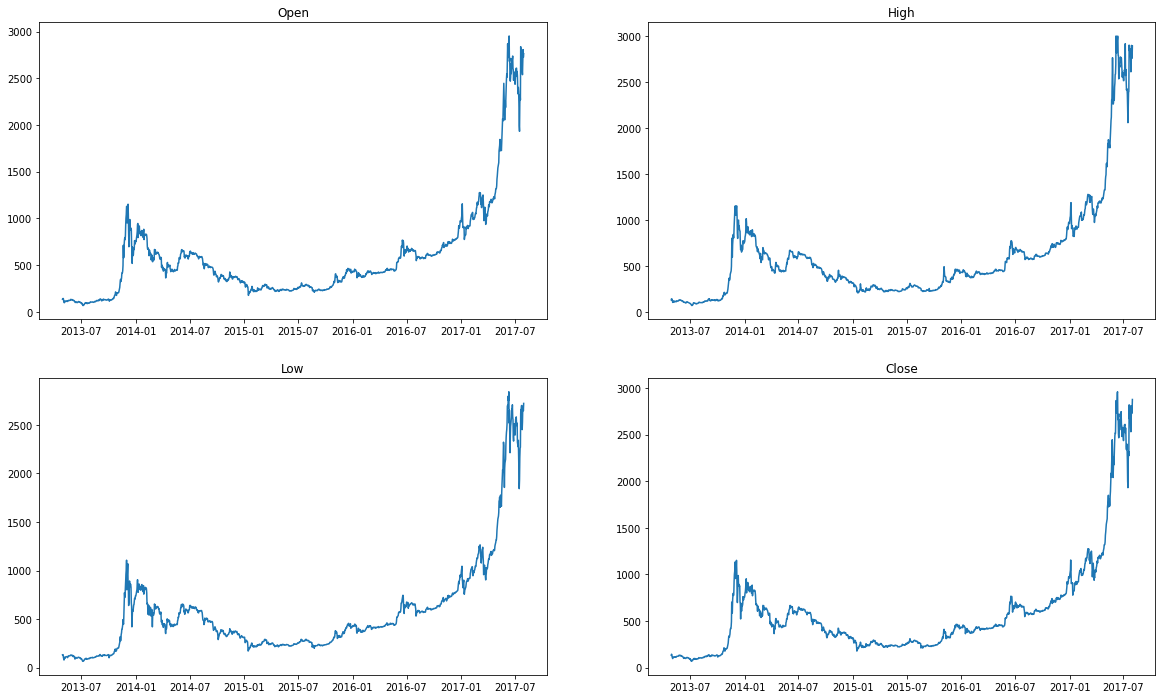

In [103]:
plt.figure(figsize=(20,12))
for index , col in enumerate(['Open', 'High', 'Low', 'Close'],1):
    plt.subplot(2, 2, index)
    plt.plot(df['Date'],df[col])
    plt.title(col)

## 4.. Analysing open , high , low , close value of stocks of apple stocks
       try out candle-stick/ohlc charts ! , both are same ..

In [154]:
bitcoin_sample = data[0:50]

In [155]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, 
plot, iplot
init_notebook_mode(connected=True)

In [156]:
trace = go.Candlestick(x= bitcoin_sample['Date'],
                       high= bitcoin_sample['High'],
                open= bitcoin_sample['Open'],
                close= bitcoin_sample['Close'],
                low= bitcoin_sample['Low'])

layout = {
    'title': 'Bitcoin Historical Price <br> <i>A closer look </i>',
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'Stock Price daily distribution (USD$)'}
}

In [157]:
candle_data = [trace]

fig = go.Figure(data= candle_data, layout=layout)
                     
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

## 5.. Analysing closing price (on normal scale & log-scale)

<AxesSubplot:>

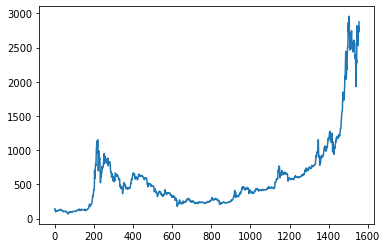

In [158]:
data['Close'].plot()

In [ ]:
### Our x-indices are number , lets first set "date" as your index 
## so that u will get date on "x-indexes" , as we are using 
## pandas plot , so for pandas plot our row indexes must be date

In [159]:
data.set_index('Date' , inplace=True)

In [161]:
data.head(4)

,Open,High,Low,Close,Volume,Market Cap,Close_price_pct_change
Date,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",NaN
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",7.696893
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",-3.832849
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",-15.834532


Text(0.5, 1.0, 'logarithmic scale')

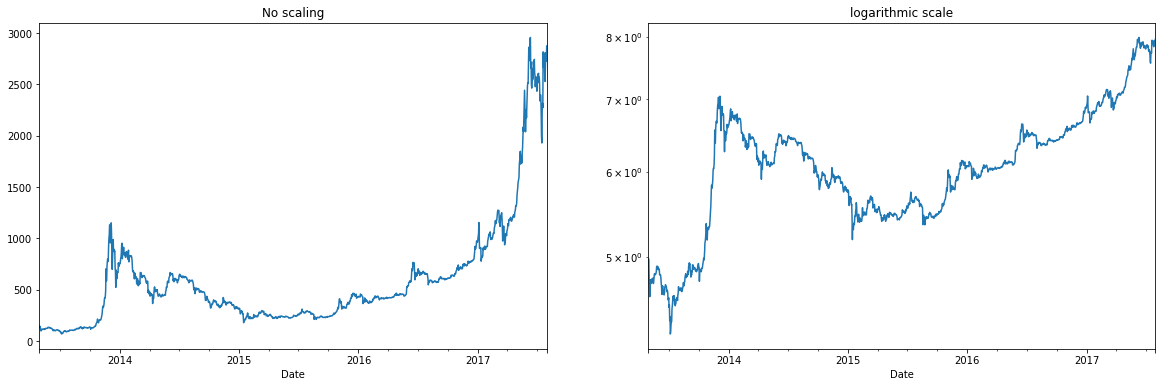

In [162]:
plt.figure(figsize=(20, 6))

plt.subplot(1,2,1)
data['Close'].plot()
plt.title("No scaling")

plt.subplot(1,2,2)
np.log1p(data['Close']).plot()
plt.yscale('log')
plt.title("logarithmic scale")


In [ ]:
### Logarithmic price scales are better than linear price scales at 
## showing less severe price increases or decreases..

### log scale is always better if u have outliers or some 
## high values in data

In [ ]:
'''


Some features of the plot above:

    There is an up-ward trend from 2016 for each graph
    There is no seasonality
    There are no outliers


'''

## 6.. Analyse closing Price on Yearly , Quarterly , monthly  basis 

#### ways to do it..
    1..using resampling
    2..using grouping

##### 1..using resampling
    Before doing resampling , first u have to make your date feature 'row-index' so that u can resample it in a 
    a..yearly('Y')  , 
    b..quarterly('Q')   ,
    c..monthly('M') ,
    d..weekly basis ('W'), 
    e..Daily_basis('D')  
    f..minutes ('3T') , 
    g..30 second bins('30S')   ,
    h..resample('17min')

<AxesSubplot:xlabel='Date'>

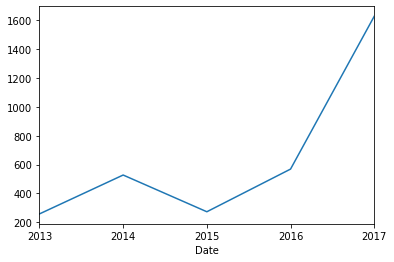

In [164]:
data['Close'].resample('Y').mean().plot()

<AxesSubplot:xlabel='Date'>

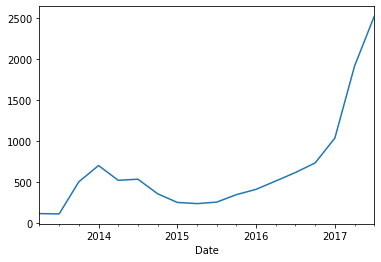

In [165]:
data['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

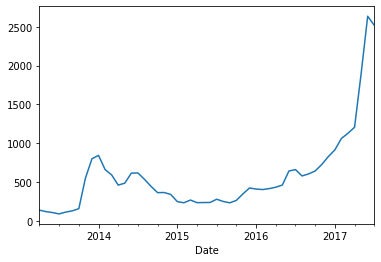

In [166]:
data['Close'].resample('M').mean().plot()

## 7.. analysing Daily change in Closing price of stocks or Daily Returns in Stock

##### Daily Stock Return Formula
    To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [108]:
data.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"


In [109]:
(data['Close'] - data['Close'].shift(1))

0          NaN
1        10.33
2        -5.54
3       -22.01
4       -11.78
         ...  
1551    142.33
1552    137.23
1553    -82.56
1554     30.73
1555    118.16
Name: Close, Length: 1556, dtype: float64

In [110]:
data['Close'].pct_change()*100

0             NaN
1        7.696893
2       -3.832849
3      -15.834532
4      -10.069237
          ...    
1551     5.626915
1552     5.136276
1553    -2.939114
1554     1.127107
1555     4.285538
Name: Close, Length: 1556, dtype: float64

In [167]:
data['Close_price_pct_change'] = data['Close'].pct_change()*100

In [168]:
data['Close_price_pct_change'] 

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_price_pct_change, Length: 1556, dtype: float64

<AxesSubplot:xlabel='Date'>

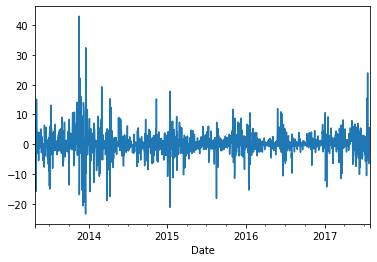

In [169]:
data['Close_price_pct_change'].plot() 

In [ ]:
'''

If u want to make this Pandas plot interactive , u can think of using cufflinks & Plotly 


'''

In [ ]:
## plot is a command of Matplotlib which is more old-school. It creates static charts
## iplot is an interactive plot. Plotly takes Python code and makes beautiful looking JavaScript plots.



## what about temp.iplot()?
## I think it uses the Cufflinks wrapper over plotly that runs Matplotlib under the hood.
## It seems to be the easiest way for me to get interactive plots with simple 1 line code,Although it needs some libraries to setup


In [ ]:
##!pip install chart_studio
##!pip install plotly

In [ ]:
### establishing the entire set-up of Plotly..

import chart_studio.plotly as py
## chart_studio provides a web-service for hosting graphs!

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
## iplot() when working in a Jupyter Notebook to display the plot in the notebook.

init_notebook_mode(connected=True)

### U have to do a proper setup of plotly , otherwise plotly plots gets open in a web-browser instead of Jupyter notebook

In [60]:
import cufflinks as cf

In [61]:
cf.go_offline()

In [170]:
data['Close_price_pct_change'].iplot()